## Assignment 4

### Machine Learning Fashionista

Splitting the data from the dataset that contains examples of Men's clothing and Women's clothing.

In [1]:
!pip install python-resize-image
!pip install resizeimage
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement resizeimage (from versions: none)
ERROR: No matching distribution found for resizeimage


In [1]:
# Importing libraries for handling image data
from PIL import Image
import PIL.ImageOps

# More relevant libraries
from glob import glob
import matplotlib.pyplot as plt
from random import shuffle, seed
from collections import defaultdict

# Importing statistical packages
import numpy as np
import pylab as pl
import pandas as pd

In [ ]:
# Packages from machine learning models of sklearn
from sklearn import metrics
from sklearn.decomposition import PCA
from skimage.transform import resize
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from skimage.io import imread_collection

In [2]:
# After loading photos to a folder, doing pre-processing
male_folder = '/content/male/*.JPEG'
male_files = glob('/content/male/*')

female_folder = '/content/female/*.JPEG'
female_files = glob('/content/female/*')

# Taking the photos in the folder together
male_clothes = imread_collection(male_folder)
female_clothes = imread_collection(female_folder)

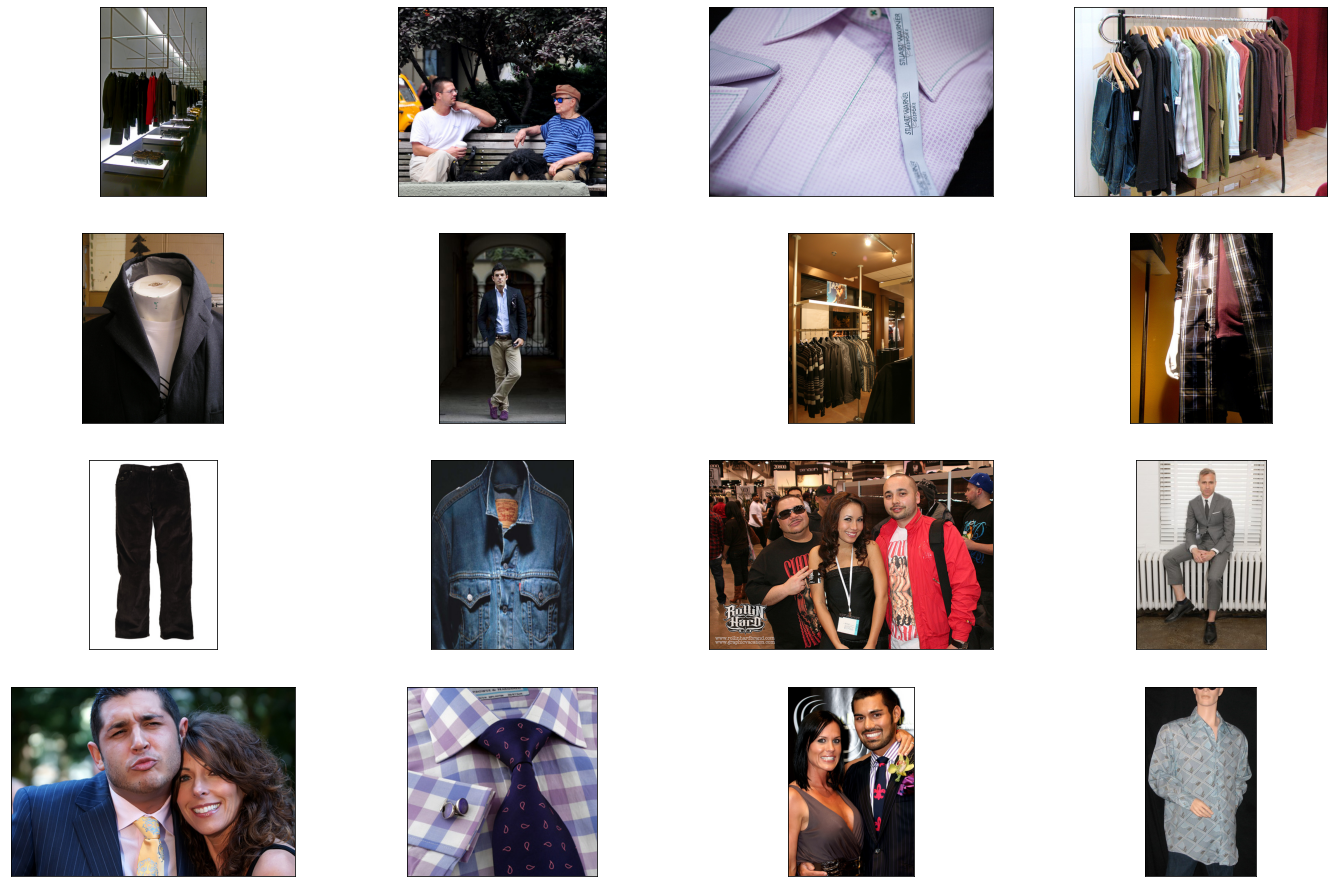

In [3]:
# Displaying a sample of the photos of male clothing in its original dimensions
fig, ax = plt.subplots(4, 4, 
                       figsize = (24, 16), 
                       subplot_kw = {'xticks':[], 'yticks':[]})

i = 0

for row in range(4):
    for col in range(4):
        ax[row, col].imshow(male_clothes[i])
        i += 1

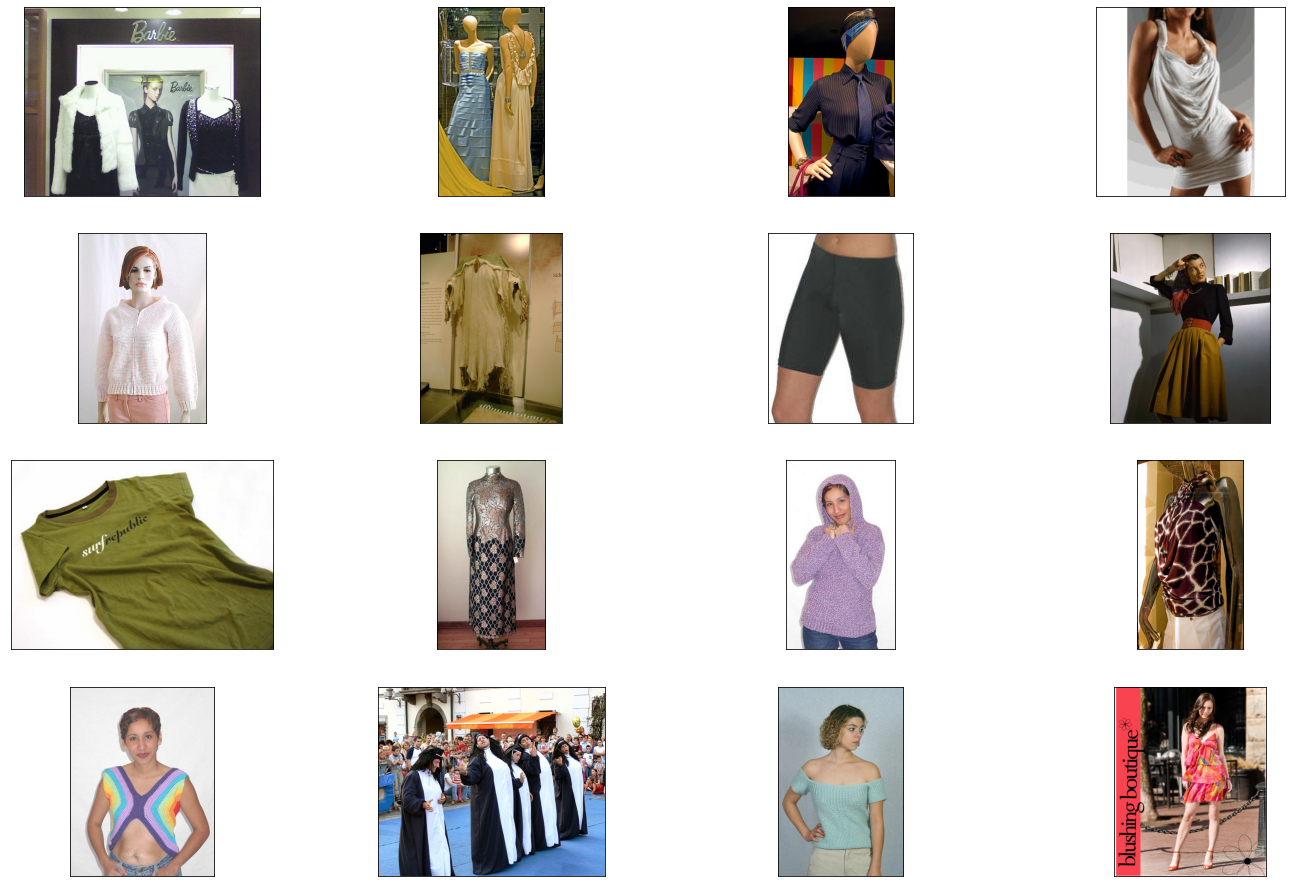

In [4]:
# Displaying a sample of the photos of female clothing in its original dimensions
fig, ax = plt.subplots(4, 4, 
                       figsize = (24, 16), 
                       subplot_kw = {'xticks':[], 'yticks':[]})

i = 0

for row in range(4):
    for col in range(4):
        ax[row, col].imshow(female_clothes[i])
        i += 1

In [5]:
# Resizing the photos to work with the same dimensions throughout the data
height_resize = 160
width_resize = 120
    
# Resizing all male photos in the data
male_resize = [resize(male_clothes[i], (height_resize, width_resize), 
                        mode='constant', anti_aliasing=True, 
                        anti_aliasing_sigma=None) for i in range(len(male_clothes))]

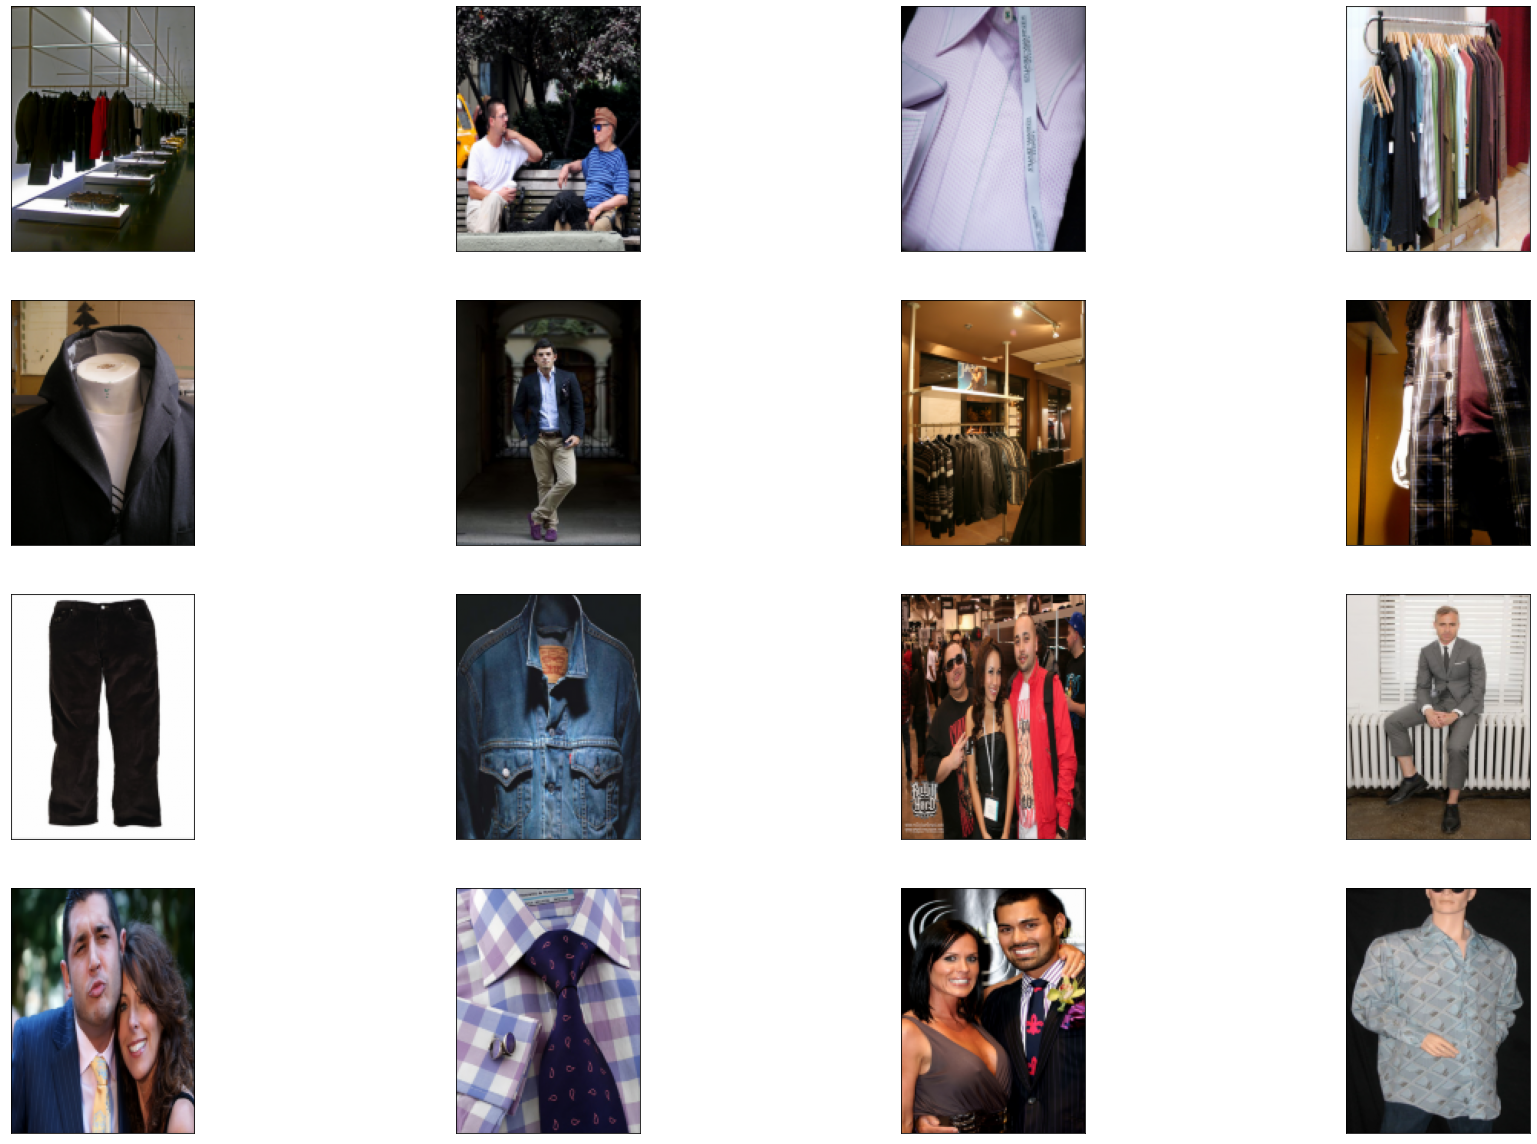

In [6]:
# Figure size and axes for the resized photos
fig, axes = plt.subplots(4, 4, figsize = (24, 16))

# Displaying some of the resized photos of male clothing
for i, ax in enumerate(axes.flatten()):
  ax.imshow(male_resize[i])
  ax.set_xticks([])
  ax.set_yticks([])

# Adjusting configuration of the photos output
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [7]:
# Resizing all female clothing photos in the data 
female_resize = [resize(female_clothes[i], (height_resize, width_resize), 
                        mode='constant', anti_aliasing=True, 
                        anti_aliasing_sigma=None) for i in range(len(female_clothes))]

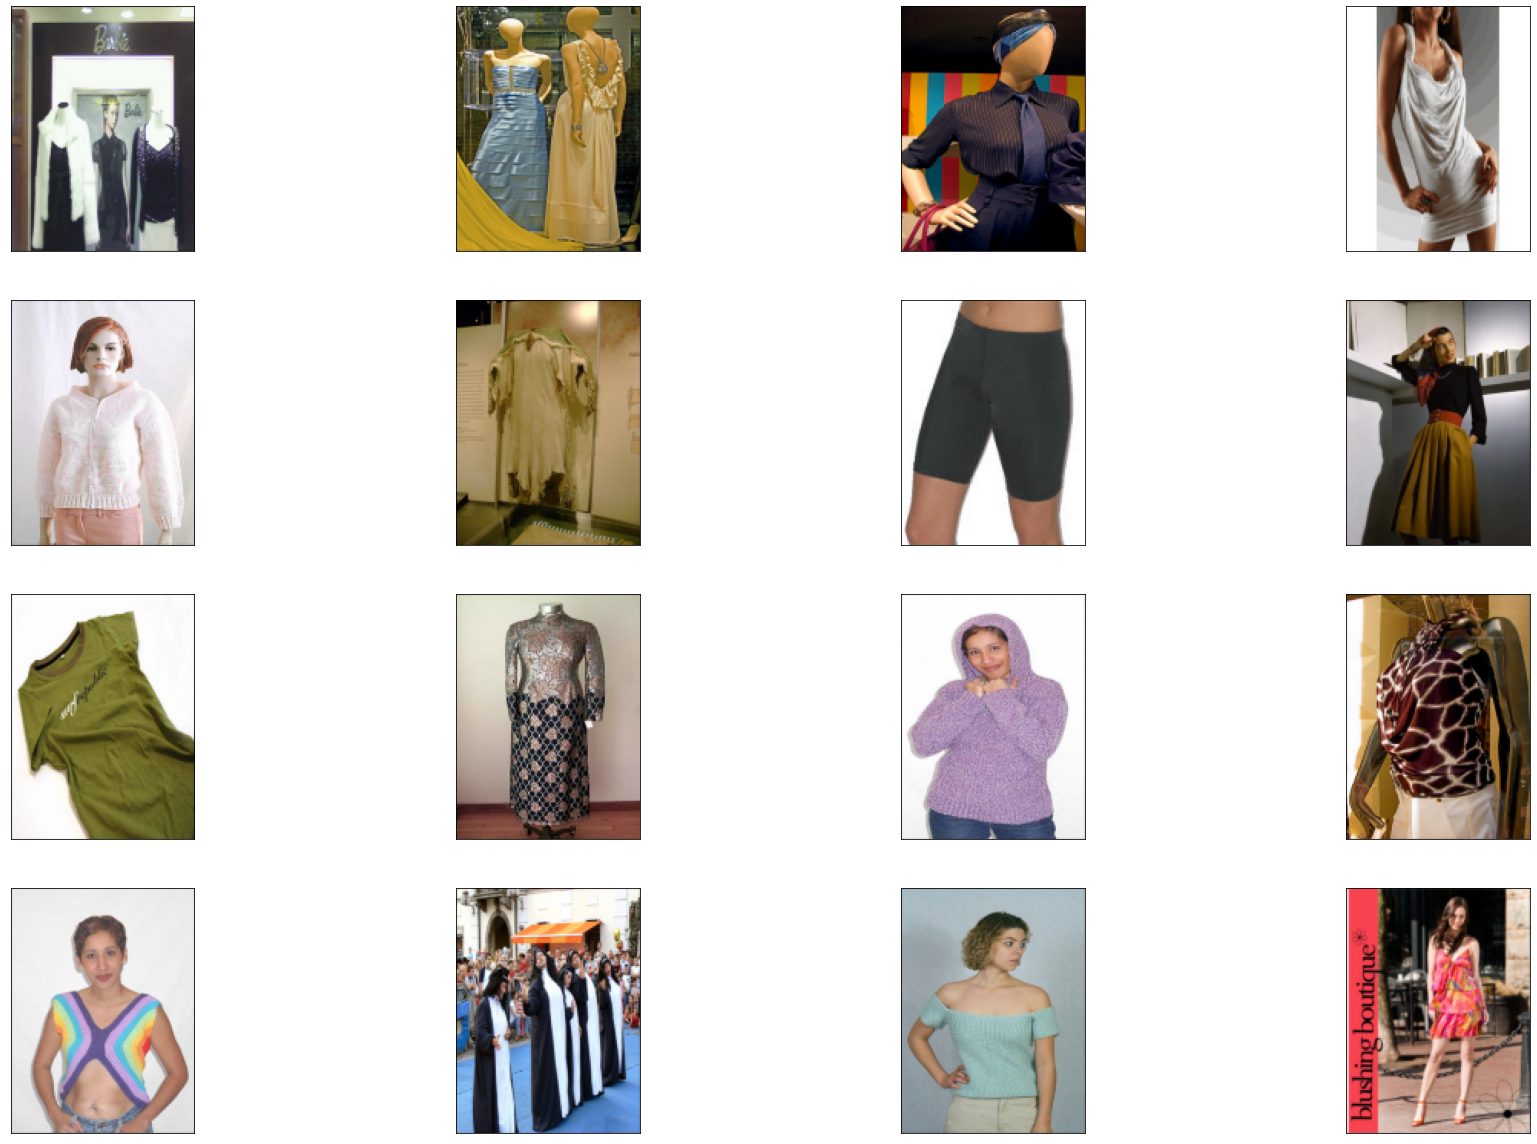

In [8]:
# Figure size and axes for displaying the resized photos
fig, axes = plt.subplots(4, 4, figsize = (24, 16))

# A sample of the resized female clothing photos
for i, ax in enumerate(axes.flatten()):
  ax.imshow(female_resize[i])
  ax.set_xticks([])
  ax.set_yticks([])

# Adjusting configuration of the photos output
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [9]:
# To work with the simple linear classifiers, the image data has to be stored as arrays
male_array = np.array([i.flatten() for i in male_resize])
female_array = np.array([i.flatten() for i in female_resize])

# Consolidating the data in a single place with 1, 0 to determine if it is male or female clothing
raw_data = [(row, '1') for row in male_array] + [(row, '0') for row in female_array]

In [13]:
# Splitting the data into training set and test set
X = np.array([x for (x,y) in raw_data])
y = np.array([y for (x,y) in raw_data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Original Pixel Data


Building a simple linear classifier using the original pixel data. Presenting an error rate on the training data and an error rate on the testing data.

In [15]:
# Using a logistic regression as our simple linear classifier
clf_log =  LogisticRegression(penalty='l2') # Logistic regression with an L2 regularization
clf_log.fit(X_train, y_train) # Fitting the model using the train data

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Classification report on training data
predicted_train_log = clf_log.predict(X_train)
score_log_train = clf_log.score(X_train, y_train)

print ("\nAccuracy score for training data: %.2f" % score_log_train)

print ("\nClassification report for training data")
print(metrics.classification_report(y_train, predicted_train_log))


Accuracy score for training data: 1.00

Classification report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       473
           1       1.00      1.00      1.00       487

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [49]:
# Classification report on test data
predicted_test_log = clf_log.predict(X_test)
score_log_test = clf_log.score(X_test, y_test)

print("Accuracy Score on test data: %.2f" % score_log_test)

print("\nClassification report on test data")
print(metrics.classification_report(y_test, predicted_test_log))

Accuracy Score on test data: 0.58

Classification report on test data
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       127
           1       0.56      0.56      0.56       113

    accuracy                           0.58       240
   macro avg       0.58      0.58      0.58       240
weighted avg       0.58      0.58      0.58       240



### Explained variance with number of components

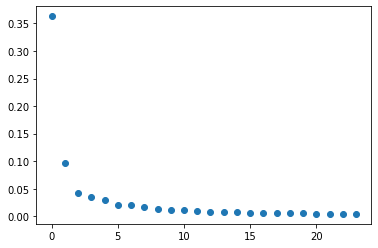

In [18]:
# Understanding how many components can explain the variance in the data
pca = PCA()
pca.fit(X_train)
plt.scatter(list(range(24)), pca.explained_variance_ratio_[:24])
plt.show()

### PCA

Training the same linear model on the reduced representation created using PCA. Presenting the error rate on the training data and the error rate on the testing data.

In [44]:
# Training linear classifier with reduced representation using PCA
pca=PCA(n_components = 12)

# PCA for train data
pca.fit(X_train)
pca_train = pca.transform(X_train)

# PCA for test data
pca.fit(X_test)
pca_test = pca.transform(X_test)

# Logistic regression model
clf_pca = LogisticRegression(penalty='l2')
clf_pca.fit(pca_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Classification report train data
predicted_train_pca = clf_pca.predict(pca_train)
score_pca_train = clf_pca.score(pca_train, y_train)

print ("\nAccuracy Score on train set: %.2f" % score_pca_train)

print ("\nClassification report on train set")
print(metrics.classification_report(y_train, predicted_train_pca))


Accuracy Score on train set: 0.65

Classification report on train set
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       473
           1       0.66      0.65      0.66       487

    accuracy                           0.65       960
   macro avg       0.65      0.65      0.65       960
weighted avg       0.65      0.65      0.65       960



In [51]:
# Classification report on test data
predicted_test_pca = clf_pca.predict(pca_test)
score_pca_test = clf_pca.score(pca_test, y_test)

print("Accuracy Score on test set: %.2f" % score_pca_test)

print("\nClassification report on test set")
print(metrics.classification_report(y_test, predicted_test_pca))

Accuracy Score on test set: 0.50

Classification report on test set
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       127
           1       0.47      0.52      0.50       113

    accuracy                           0.50       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.50      0.50      0.50       240



### LDA

Training the same linear model on the reduced representation created using LDA. Presenting the error rate on the training data and the error rate on the testing data.

In [43]:
# Training a logistic regression using LDA
lda = LinearDiscriminantAnalysis(n_components=1)

# LDA on train data
lda.fit(X_train, y_train)
lda_train = lda.transform(X_train)

# LDA on test data
lda.fit(X_test, y_test)
lda_test = lda.transform(X_test)

# Training the logistic regression model
clf_lda = LogisticRegression(penalty='l2')
clf_lda.fit(lda_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# Train data classification report
predicted_train_lda = clf_lda.predict(lda_train)
score_lda_train = clf_lda.score(lda_train, y_train)

print ("\nAccuracy score on train data: %.2f" % score_lda_train)

print ("\nClassification report on train data")
print(metrics.classification_report(y_train, predicted_train_lda))


Accuracy score on train data: 0.91

Classification report on train data
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       473
           1       0.92      0.92      0.92       487

    accuracy                           0.91       960
   macro avg       0.91      0.91      0.91       960
weighted avg       0.91      0.91      0.91       960



In [53]:
# Classification report for test data
predicted_test_lda = clf_lda.predict(lda_test)
score_lda_test = clf_lda.score(lda_test, y_test)

print("Accuracy score on test data: %.2f" % score_lda_test)

print("\nClassification report on test data")
print(metrics.classification_report(y_test, predicted_test_lda))

Accuracy score on test data: 0.87

Classification report on test data
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       127
           1       0.84      0.89      0.87       113

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240



### Analysis

Description and interpretation of the results from the three models. Recommendation about classifiers.

Given a simple linear classifier, a logistic regression with L2 regularization, we obtain better accuracy (smaller error rate) on both the training data and testing data when we are using reduced representation using LDA.

#### Original Pixel Data

In the first example, we trained the classifier using the original pixel data with minor pre-processing such as using just a sample of the original dataset and resizing the images so that they would have same dimensions.

The accuracy of the logistic regression on the training data was of 100%. We are not interested in a simple classifier like this to obtain perfect accuracy because by fitting perfectly to the training data, it will have poor performance on new data. This means that it is overfitting, some reasons could be the number of samples in the dataset and the dimensions of the image data as arrays even after resizing them.

As expected, the accuracy on te test data is poor at about 58.3%

#### Reducing performance on training data

We do not want perfect accuracy. We can reduce performance on the training data so that the model can generalize when it encounters new data.

Using both PCA and LDA, the performance on the training data is reduced.

#### Using Principal Component Analysis

Principal component analysis helps to reduce the dimensionality of the data by projecting the data down to lower dimensions based on the variance. The number of components is based on how many principal components can explain the variance in the data. 

Using PCA, the accuracy on the training data was 65.2% which is an improvement because we are no longer overfitting the data. However, the accuracy on the test data decreased to 50.3%.

#### Using Linear Discriminant Analysis

Linear Discriminant Analysis helps to reduce the dimensionality of the data by finding the optimal dimensions that maximize separability. 

Using LDA, the accuracy on the training data was 91.5% which is very great accuracy while not overfitting and the accuracy on the test data was 87.1% which provides better results than the other methods.